In [28]:
import numpy as np
import scipy.integrate as integrate
import matplotlib as mpl
mpl.use('pgf')
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants
from astropy import units as u
from cycler import cycler
import scipy.interpolate
import matplotlib.ticker as mticker
import math
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')





SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams.update({
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.rcParams.update({'font.size': 15})

mpl.rcParams['axes.prop_cycle'] = cycler(color=['dodgerblue', 'salmon', 'limegreen'])

In [29]:
def RescalingCenters(DataSet, Nbins, Bins_limit=None):

    if Bins_limit==None:
        bins_max=DataSet[-1][0]
        bins_min=DataSet[0][0]
    else:
        bins_max=Bins_limit[1]
        bins_min=Bins_limit[0]
        
    x_data=DataSet[:,0]
    bins_edges=np.logspace(np.log10(bins_min), np.log10(bins_max), Nbins+1)
    bins_centers = np.array([0.5 * (bins_edges[i] + bins_edges[i+1]) for i in range(Nbins)])
    y_data=DataSet[:,1]

    y_stackable = np.zeros(Nbins)

    for j in range(Nbins):
        for i in range(len(x_data)):
            if (x_data[i]<bins_edges[j+1])and(x_data[i]>bins_edges[j]):
                x_data[i]=bins_centers[j]
                y_stackable[j]=round(y_data[i])
            else:
                pass

        
    return bins_edges, bins_centers,  y_stackable

In [30]:
def DataStack(DataSets, Nbins):

    a=np.empty(len(DataSets), dtype=object)
    for i in range(len(DataSets)):
        a[i] = DataSets[i][:,0]
    a=np.concatenate(a)
    
    bins_max=max(a)

    bins_min=min(a)

    bins_limit=(bins_min, bins_max)

    y_stacked = np.zeros(Nbins)
    for i in range(len(DataSets)):

        bins_edges, bins_center, y_stackable = RescalingCenters(DataSets[i], Nbins, Bins_limit=(bins_min, bins_max))
        y_stacked += y_stackable

    return bins_edges, bins_center, y_stacked

In [33]:
#Hirano 2014

pathfit_Hirano2014 = '/Users/antoninpantalacci/Desktop/Master Project/Papernotes and Books/Graph/Fit/Hirano2014/'
name_Hirano2014 = ['Total', 'Bins']
Hirano2014 = np.empty(len(name_Hirano2014), dtype=object)
Nbins_Hirano2014 = 26
for i in range(len(name_Hirano2014)):
    Hirano2014[i] = np.genfromtxt(pathfit_Hirano2014 + name_Hirano2014[i] +'.csv', delimiter=';')

Bins_Hirano2014_min = min(Hirano2014[-1][0][0])
Bins_Hirano2014_max = max(Hirano2014[-1][1][0])
print(Bins_Hirano2014_max, Bins_Hirano2014_min, Hirano2014[-1])

Bins_limit_Hirano2014=(Bins_Hirano2014_min, Bins_Hirano2014_max)

Hirano2014_edges, Hirano2014_centers, Hirano2014_Y = DataStack(Hirano2014, Nbins_Hirano2014)

PermissionError: [Errno 1] Operation not permitted: '/Users/antoninpantalacci/Desktop/Master Project/Papernotes and Books/Graph/Fit/Hirano2014/Total.csv'

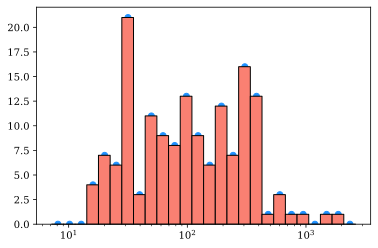

In [ ]:
plt.scatter(Hirano2014_centers, Hirano2014_Y)
plt.bar(Hirano2014_edges[:-1], Hirano2014_Y, width=np.diff(Hirano2014_edges), ec="k", align="edge")

# plt.plot(Hirano_x, binfit, 'r-.', alpha=0.8)
plt.xscale('log')

In [34]:
#Susa2014

pathfit_susa = '/Users/antoninpantalacci/Desktop/Master Project/Papernotes and Books/Graph/Fit/Susa2014/'
name_susa = ['z<10', '10<z<14', '14<z']
Susa = np.empty(len(name_susa), dtype=object)
for i in range(len(name_susa)):
    Susa[i] = np.genfromtxt(pathfit_susa + name_susa[i] +'.csv', delimiter=';')

Bins_limit_Susa=[[0.47109741431987984, 297.00189937790844]]
Nbins_Susa = 20


PermissionError: [Errno 1] Operation not permitted: '/Users/antoninpantalacci/Desktop/Master Project/Papernotes and Books/Graph/Fit/Susa2014/z<10.csv'

In [ ]:
Susa_Y=np.empty(len(Susa), dtype=object)
Susa_edges = np.empty(len(Susa), dtype=object)
Susa_centers = np.empty(len(Susa), dtype=object)

for i in range(len(Susa)):
    Susa_edges[i], Susa_centers[i], Susa_Y[i] =RescalingCenters(Susa[i], Nbins_Susa, Bins_limit=[0.47109741431987984, 297.00189937790844])

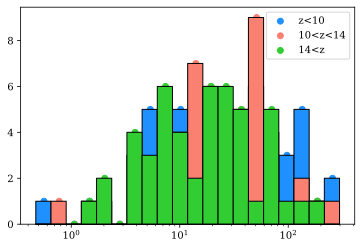

In [ ]:
for i in range(3):
    plt.bar(Susa_edges[i][:-1], Susa_Y[i], width=np.diff(Susa_edges[i]), ec="k", align="edge")
for i in range(3):
    plt.scatter(Susa_centers[i], Susa_Y[i], label=f'{name_susa[i]}')
plt.xscale('log')
plt.legend()

In [ ]:
#Stacy 2013

def Stacy2013(M, M_min, M_max):
    IMF = M**(-0.17)
    N = integrate.quad(lambda M: IMF, M_min, M_max, epsrel=1e-2)[0]
    return IMF/N

In [ ]:
#hirano 2015
name_Hirano2015 = ['Total', '10<z<14', '14<z<18', '18<z<22', '22<z<26', '26<z<30', 'Bins']

pathfit_Hirano2015= '/Users/antoninpantalacci/Desktop/Master Project/Papernotes and Books/Graph/Fit/Hirano2015/'
Hirano2015 = np.empty(len(name_Hirano2015), dtype=object)
for i in range(len(name_Hirano2015)):
    Hirano2015[i] = np.genfromtxt(pathfit_Hirano2015 + name_Hirano2015[i] +'.csv', delimiter=';')

Nbins_Hirano2015 = len(Hirano2015[0])
Bins_Hirano2015_min = min(Hirano2015[-1][:,0])
Bins_Hirano2015_max = max(Hirano2015[-1][:,0])
Bins_limit_Hirano2015=(Bins_Hirano2015_min, Bins_Hirano2015_max)


Hirano2015_Y=np.empty(len(Hirano2015), dtype=object)
Hirano2015_edges = np.empty(len(Hirano2015), dtype=object)
Hirano2015_centers = np.empty(len(Hirano2015), dtype=object)

for i in range(len(Hirano2015)):
    Hirano2015_edges[i], Hirano2015_centers[i], Hirano2015_Y[i] = RescalingCenters(Hirano2015[i], Nbins_Hirano2015, Bins_limit=Bins_limit_Hirano2015)


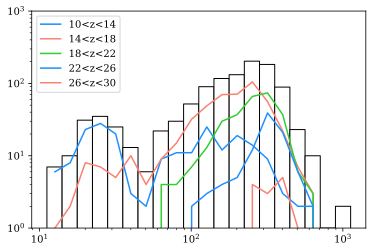

In [ ]:

plt.bar(Hirano2015_edges[0][:-1], Hirano2015_Y[0], width=np.diff(Hirano2015_edges[i]), ec="k", align="edge", color='white')
for i in range(1, len(Hirano2015)-1):
    plt.plot(Hirano2015_centers[i], Hirano2015_Y[i], label=f'{name_Hirano2015[i]}')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, 1000)
plt.legend()